In [100]:
import numpy as np
import matplotlib.pyplot as plt


# 生成正态分布噪声
mu = 0  # 正态分布的均值
sigma = 0.1  # 正态分布的标准差
noise = np.random.normal(mu, sigma)  # 生成与噪声
print("噪声：",noise)

X = np.random.rand(1000, 2)  # 1000个数据点，每个数据点有两个特征x1和x2
print("样本：")
print(X)
y = 1 + 3*X[:, 0] + 5*X[:, 1] + noise  # 生成对应的目标值，加入噪声

# 定义损失函数(均方差)
def loss_function(theta, X, y):
    y_pred = theta[0] + theta[1]*X[:, 0] + theta[2]*X[:, 1]
    return np.mean((y_pred - y)**2)

噪声： 0.05358031946094575
样本：
[[0.01097497 0.61415589]
 [0.31977485 0.60749054]
 [0.18582246 0.00802178]
 ...
 [0.50214248 0.18577767]
 [0.69912393 0.09303135]
 [0.95826988 0.03002558]]


# 随机梯度下降

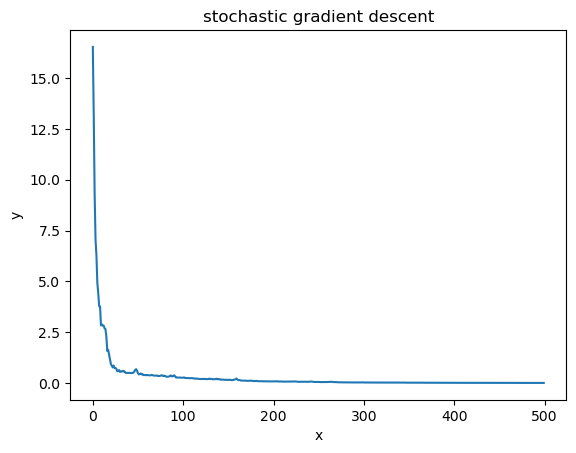

[1.17025697 2.92469592 4.87242251]


In [101]:
# 初始化模型参数
theta = np.random.randn(3)

# 定义学习率和迭代次数
learning_rate = 0.1
num_iterations = 500

# 存储损失函数值的列表
loss_history = []

# 批量梯度下降训练模型
m = len(X)

for iteration in range(num_iterations):
    # 随机梯度
    random_index = np.random.randint(0, m)      # 随机抽取一个样本
    xi = X[random_index]
    yi = y[random_index]

    y_pre = (theta[0] + theta[1]*xi[0] + theta[2]*xi[1])
    gradients = -1 * np.array([
        yi - y_pre,
        (yi - y_pre) * xi[0],
        (yi - y_pre) * xi[1]
    ])
    theta -= learning_rate * gradients

    # 计算损失函数值并记录
    loss = loss_function(theta, X, y)
    loss_history.append(loss)


# 绘制损失函数的变化
plt.plot(range(num_iterations), loss_history)
plt.xlabel('x')
plt.ylabel('y')
plt.title('stochastic gradient descent')
plt.show()
print(theta)

# 批量梯度下降

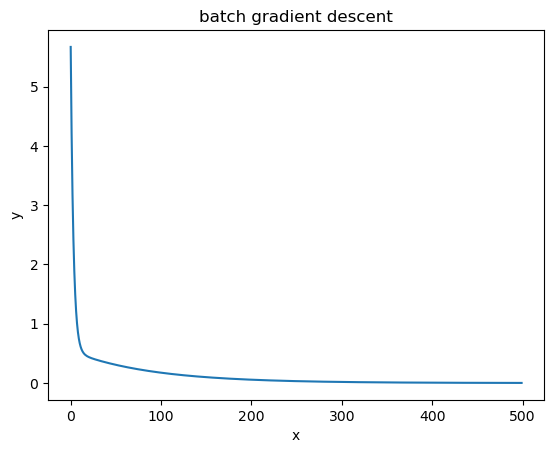

[1.16302145 2.90458328 4.88802351]


In [102]:
# 初始化模型参数
theta = np.random.randn(3)

# 定义学习率和迭代次数
learning_rate = 0.1
num_iterations = 500

# 存储损失函数值的列表
loss_history = []

# 批量梯度下降训练模型
m = len(X)

for iteration in range(num_iterations):
    #批量梯度
    y_pre = (theta[0] + theta[1]*X[:, 0] + theta[2]*X[:, 1])        # 模型对目标变量的预测值
    gradients = -1/m * np.array([
        np.sum(y - y_pre),
        np.sum((y - y_pre) * X[:, 0]),
        np.sum((y - y_pre) * X[:, 1])
    ])

    theta -= learning_rate * gradients

    # 计算损失函数值并记录
    loss = loss_function(theta, X, y)
    loss_history.append(loss)


# 绘制损失函数的变化
plt.plot(range(num_iterations), loss_history)
plt.xlabel('x')
plt.ylabel('y')
plt.title('batch gradient descent')
plt.show()
print(theta)
